In [7]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows',800)

df=pd.read_csv('..\Data\cleaned_googleplaystore.csv')

List the top 5 apps with smallest size and highest number of downloads/installs(Barnabas)

Highest installed apps among top 5 smallest size apps

In [ ]:
df[df['Size']!=-99.99][['Category','App','Size','Installs']].sort_values('Size').head(5).sort_values('Installs', ascending=False)

Smallest size apps among Top 5 highest installed apps

In [ ]:
df[df['Size']!=-99.99][['Category','App','Size','Installs']].sort_values('Installs',ascending=False).head(5).sort_values('Size')

List the top 5 app in each category Free and Paid separately (Vaibhav)

In [8]:
df_deneme=df[['Category','Type','App','Installs']].sort_values(['Category','Type','Installs'], ascending=[True,True,False])

df_top_apps=df_deneme.groupby(['Category','Type']).head(5)

df_top_apps.reset_index(inplace=True,drop=True)

df_top_apps.head(5)

,Category,Type,App,Installs
0,ART_AND_DESIGN,Free,Sketch - Draw & Paint,50000000
1,ART_AND_DESIGN,Free,Tattoo Name On My Photo Editor,10000000
2,ART_AND_DESIGN,Free,ibis Paint X,10000000
3,ART_AND_DESIGN,Free,"Canva: Poster, banner, card maker & graphic de...",10000000
4,ART_AND_DESIGN,Free,Textgram - write on photos,10000000


In [9]:
df_merged= df_top_apps.query('Type=="Free"').merge(df_top_apps.query('Type=="Paid"'),on='Category')

# df_merged.drop_duplicates(['App_x','App_y'],inplace=True)
df_merged.head(5)

,Category,Type_x,App_x,Installs_x,Type_y,App_y,Installs_y
0,ART_AND_DESIGN,Free,Sketch - Draw & Paint,50000000,Paid,X Launcher Pro - IOS Style Theme & Control Center,10000
1,ART_AND_DESIGN,Free,Sketch - Draw & Paint,50000000,Paid,"X Launcher Pro: PhoneX Theme, OS11 Control Center",5000
2,ART_AND_DESIGN,Free,Sketch - Draw & Paint,50000000,Paid,X Launcher Prime: With OS Style Theme & No Ads,1000
3,ART_AND_DESIGN,Free,Tattoo Name On My Photo Editor,10000000,Paid,X Launcher Pro - IOS Style Theme & Control Center,10000
4,ART_AND_DESIGN,Free,Tattoo Name On My Photo Editor,10000000,Paid,"X Launcher Pro: PhoneX Theme, OS11 Control Center",5000


In [ ]:
df_top_apps[['Type','App','Installs']].query('Type=="Paid"').values

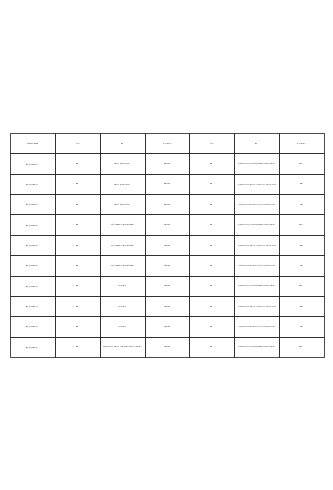

In [32]:
fig,ax=plt.subplots(figsize=(5,5))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=df_merged[:10].values, colLabels=['Category Name','Type','App','# of Installs','Type','App','# of Installs'], loc='center',
                colWidths=[0.25]*len(df_merged.columns),fontsize=100,cellLoc='center')
fig.tight_layout()
# colWidths=[0.25]*len(df_merged.columns),
# plt.axis('tight')

# table.set_fontsize(30)

# plt.axis('off')
plt.show()